# Hotel Booking Data Analysis Project

###### I take this data from kaggle website

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
Hotel_Data = pd.read_csv(r'C:\Users\RAJAT\Desktop\my notes\Data Analysis Projects\Hotel Booking Project/hotel_bookings (1).csv')

In [3]:
Hotel_Data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [4]:
Hotel_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
Hotel_Data.shape # we have 119390 rows and 32 columns of Data. it is very big Row Data 

(119390, 32)

## we start preprocessing the data

In [6]:
# 1st check that data have any null or empty values or not

In [7]:
Hotel_Data.isnull().values.any() # so we have null values now we handle null values

True

In [8]:
Hotel_Data.isnull().sum()
# so we have three columns 'country','agent','company','childern' having null values 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### important insides
#### company having highest null values so we can say that people are booking hotel privetly (individual) without company
#### agent having also high amount of missing values so we can say that mostly people are book hotel itself without agent

In [9]:
Hotel_Data['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [10]:
Hotel_Data['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [11]:
Hotel_Data['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [12]:
Hotel_Data['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [13]:
Hotel_Data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

###### we can see that in babies,children,adults are having 0 so there is some dirtyness in our data so we need to clean

In [14]:
filter = ((Hotel_Data['adults'] == 0) & (Hotel_Data['children'] ==0) & (Hotel_Data['babies'] ==0))
Hotel_Data[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
2224                       3       0  ...    No Deposit    NaN   174.0   
2409                       0       0  ...    No Deposit    NaN   174.0   
3181                       2       0  ...    No Deposit   38.0     NaN   
3684                       4       0  ...    No Deposit  308.0     NaN   
3708                       4       0  ...    No Deposit  308.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
115029                     3       0  ...    No Deposit    7.0     NaN   
115091                     1       0  ...    No Deposit    NaN     NaN   
116251                     1       0  ...    No Deposit  425.0     NaN   
116534                     5       0  ...    No Deposit    9.0     NaN   
117087                     2       0  ...    No Deposit   52.0     NaN   

       days_in_waiting_list    customer_type     adr  \
2224                      0  Transient-Party    0.00   
2409                      0        Transient    0.00   
3181                      0  Transient-Party    0.00   
3684                    122  Transient-Party    0.00   
3708                    122  Transient-Party    0.00   
...                     ...              ...     ...   
115029                    0        Transient  100.80   
115091                    0        Transient    0.00   
116251                    0        Transient   73.80   
116534                    0  Transient-Party   22.86   
117087                    0        Transient    0.00   

        required_car_parking_spaces  total_of_special_requests  \
2224                              0                          0   
2409                              0                          0   
3181                              0         

### so we have that much number of wrong entires in our data becouse at a time adults,childrens,babies cant be zeros

In [15]:
New_Hotel = Hotel_Data[~filter]

In [16]:
New_Hotel

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

### now we have that much of accurates data in our csv file

In [17]:
# where do guests come

In [18]:
New_Hotel['hotel'].value_counts() # we have two types of hotels

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

In [19]:
Resort_Hotel = New_Hotel[(New_Hotel['hotel'] == 'Resort Hotel') & (New_Hotel['is_canceled'] == 0)]
City_Hotel = New_Hotel[(New_Hotel['hotel'] == 'City Hotel') & (New_Hotel['is_canceled'] == 0)]

In [20]:
Resort_Hotel.head() # This is data of resort hotel that not not be cansal

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [21]:
Resort_Hotel.shape

(28927, 32)

In [22]:
City_Hotel.head() # This is data of city hotel that not not be cansal

hotel  is_canceled  lead_time  arrival_date_year  \
40060  City Hotel            0          6               2015   
40066  City Hotel            0          3               2015   
40070  City Hotel            0         43               2015   
40071  City Hotel            0         43               2015   
40072  City Hotel            0         43               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40060               July                        27                          1   
40066               July                        27                          2   
40070               July                        27                          3   
40071               July                        27                          3   
40072               July                        27                          3   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40060                        0                     2       1  ...   
40066                        0                     3       1  ...   
40070                        0                     2       2  ...   
40071                        0                     2       2  ...   
40072                        0                     2       2  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
40060    No Deposit    6.0     NaN                    0        Transient   
40066    No Deposit    1.0     NaN                    0  Transient-Party   
40070    No Deposit    1.0     NaN                    0  Transient-Party   
40071    No Deposit    1.0     NaN                    0  Transient-Party   
40072    No Deposit    1.0     NaN                    0  Transient-Party   

         adr  required_car_parking_spaces  total_of_special_requests  \
40060   0.00                            0                          0   
40066  58.67                            0                          0   
40070  86.00                            0                          0   
40071  43.00                            0                          0   
40072  86.00                            0                          0   

       reservation_status reservation_status_date  
40060           Check-Out                7/3/2015  
40066           Check-Out                7/5/2015  
40070           Check-Out                7/5/2015  
40071           Check-Out                7/5/2015  
40072           Check-Out                7/5/2015  

[5 rows x 32 columns]

In [23]:
City_Hotel.head()

hotel  is_canceled  lead_time  arrival_date_year  \
40060  City Hotel            0          6               2015   
40066  City Hotel            0          3               2015   
40070  City Hotel            0         43               2015   
40071  City Hotel            0         43               2015   
40072  City Hotel            0         43               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40060               July                        27                          1   
40066               July                        27                          2   
40070               July                        27                          3   
40071               July                        27                          3   
40072               July                        27                          3   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40060                        0                     2       1  ...   
40066                        0                     3       1  ...   
40070                        0                     2       2  ...   
40071                        0                     2       2  ...   
40072                        0                     2       2  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
40060    No Deposit    6.0     NaN                    0        Transient   
40066    No Deposit    1.0     NaN                    0  Transient-Party   
40070    No Deposit    1.0     NaN                    0  Transient-Party   
40071    No Deposit    1.0     NaN                    0  Transient-Party   
40072    No Deposit    1.0     NaN                    0  Transient-Party   

         adr  required_car_parking_spaces  total_of_special_requests  \
40060   0.00                            0                          0   
40066  58.67                            0                          0   
40070  86.00                            0                          0   
40071  43.00                            0                          0   
40072  86.00                            0                          0   

       reservation_status reservation_status_date  
40060           Check-Out                7/3/2015  
40066           Check-Out                7/5/2015  
40070           Check-Out                7/5/2015  
40071           Check-Out                7/5/2015  
40072           Check-Out                7/5/2015  

[5 rows x 32 columns]

In [24]:
City_Hotel.shape

(46084, 32)

# 1.Checking Home Country of People

In [25]:
Data = New_Hotel[New_Hotel["is_canceled"]== 0]['country'].value_counts().reset_index()

In [26]:
Data.head()

index  country
0   PRT    20977
1   GBR     9668
2   FRA     8468
3   ESP     6383
4   DEU     6067

In [27]:
Data.columns=['country','no_of_people']

In [28]:
Data.head()

country  no_of_people
0     PRT         20977
1     GBR          9668
2     FRA          8468
3     ESP          6383
4     DEU          6067

In [29]:
import folium
from folium.plugins import HeatMap

In [33]:
basemap=folium.Map()
import plotly.express as px

In [34]:
Data.dtypes

country         object
no_of_people     int64
dtype: object

In [35]:
graph = px.choropleth(Data,locations=Data['country'],color=Data["no_of_people"],hover_name=Data["country"],
              title = "Home Country of guste")
graph.show()

#### people all over the county stay in this hotel but most of the people is from portugal, france,Esp,Gbr and other country

## 2.How much do guests pay for a room per night?

In [36]:
New_Hotel.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [37]:
Data_new = New_Hotel[New_Hotel['is_canceled']== 0]

In [38]:
New_Hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

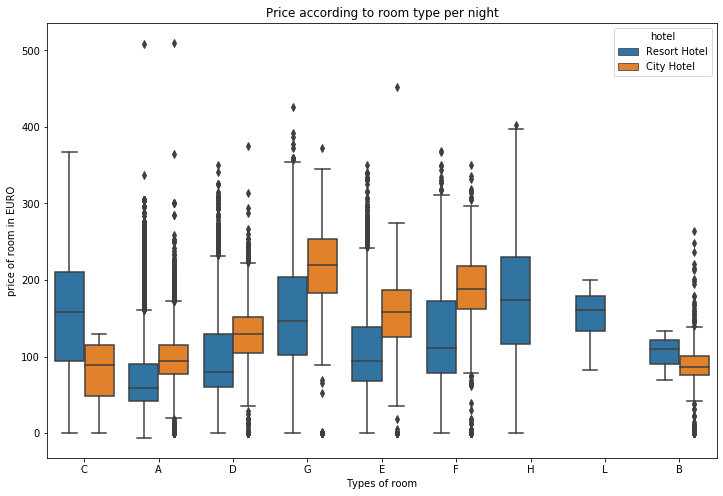

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='reserved_room_type',
           y='adr',
           hue='hotel',
           data= Data_new)
plt.xlabel("Types of room")
plt.ylabel('price of room in EURO')
plt.title('Price according to room type per night')
plt.show()

###### This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

## 3. How does the price per night vary over the year?

In [40]:
Resort_Data = Resort_Hotel[Resort_Hotel['is_canceled']==0]
City_Data = City_Hotel[City_Hotel['is_canceled']==0]


In [41]:
Resort_Data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [42]:
City_Data.head()

hotel  is_canceled  lead_time  arrival_date_year  \
40060  City Hotel            0          6               2015   
40066  City Hotel            0          3               2015   
40070  City Hotel            0         43               2015   
40071  City Hotel            0         43               2015   
40072  City Hotel            0         43               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40060               July                        27                          1   
40066               July                        27                          2   
40070               July                        27                          3   
40071               July                        27                          3   
40072               July                        27                          3   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40060                        0                     2       1  ...   
40066                        0                     3       1  ...   
40070                        0                     2       2  ...   
40071                        0                     2       2  ...   
40072                        0                     2       2  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
40060    No Deposit    6.0     NaN                    0        Transient   
40066    No Deposit    1.0     NaN                    0  Transient-Party   
40070    No Deposit    1.0     NaN                    0  Transient-Party   
40071    No Deposit    1.0     NaN                    0  Transient-Party   
40072    No Deposit    1.0     NaN                    0  Transient-Party   

         adr  required_car_parking_spaces  total_of_special_requests  \
40060   0.00                            0                          0   
40066  58.67                            0                          0   
40070  86.00                            0                          0   
40071  43.00                            0                          0   
40072  86.00                            0                          0   

       reservation_status reservation_status_date  
40060           Check-Out                7/3/2015  
40066           Check-Out                7/5/2015  
40070           Check-Out                7/5/2015  
40071           Check-Out                7/5/2015  
40072           Check-Out                7/5/2015  

[5 rows x 32 columns]

In [43]:
Resort_month_price = Resort_Data.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [44]:
Resort_month_price

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

In [45]:
City_month_price = City_Data.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [46]:
City_month_price

arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582

In [47]:
Final_Data = Resort_month_price.merge(City_month_price,on='arrival_date_month')

In [48]:
Final_Data

arrival_date_month       adr_x       adr_y
0               April   75.867816  111.962267
1              August  181.205892  118.674598
2            December   68.410104   88.401855
3            February   54.147478   86.520062
4             January   48.761125   82.330983
5                July  150.122528  115.818019
6                June  107.974850  117.874360
7               March   57.056838   90.658533
8                 May   76.657558  120.669827
9            November   48.706289   86.946592
10            October   61.775449  102.004672
11          September   96.416860  112.776582

In [49]:
Final_Data.columns = ['Month_Arival','Price_of_Resort_Hotel','Price_of_City_Hotel']

In [50]:
Final_Data

Month_Arival  Price_of_Resort_Hotel  Price_of_City_Hotel
0         April              75.867816           111.962267
1        August             181.205892           118.674598
2      December              68.410104            88.401855
3      February              54.147478            86.520062
4       January              48.761125            82.330983
5          July             150.122528           115.818019
6          June             107.974850           117.874360
7         March              57.056838            90.658533
8           May              76.657558           120.669827
9      November              48.706289            86.946592
10      October              61.775449           102.004672
11    September              96.416860           112.776582

###### now we will observe over here is month column is not in order, & if we will visualise we will get improper conclusion
###### so very first we have to provide right hierarchy to the month column


In [51]:
import sort_dataframeby_monthorweek as sd

In [52]:
final = sd.Sort_Dataframeby_Month(df = Final_Data, monthcolumnname="Month_Arival")

In [53]:
final

Month_Arival  Price_of_Resort_Hotel  Price_of_City_Hotel
0       January              48.761125            82.330983
1      February              54.147478            86.520062
2         March              57.056838            90.658533
3         April              75.867816           111.962267
4           May              76.657558           120.669827
5          June             107.974850           117.874360
6          July             150.122528           115.818019
7        August             181.205892           118.674598
8     September              96.416860           112.776582
9       October              61.775449           102.004672
10     November              48.706289            86.946592
11     December              68.410104            88.401855

In [54]:
px.line(final,x="Month_Arival",y=['Price_of_Resort_Hotel','Price_of_City_Hotel'],title= 'Price according to Month')

###### Conclusion-->> This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here)., The price of the city hotel varies less and is most expensive during spring and autumn.

### In summer may to september price of resort hotel very high becouse of may be people like to spent there summer in resort hotels so that time resort price is very high

## 4.Distribution of Nights Spent at Hotels by Market Segment and Hotel Type

In [55]:
New_Hotel.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

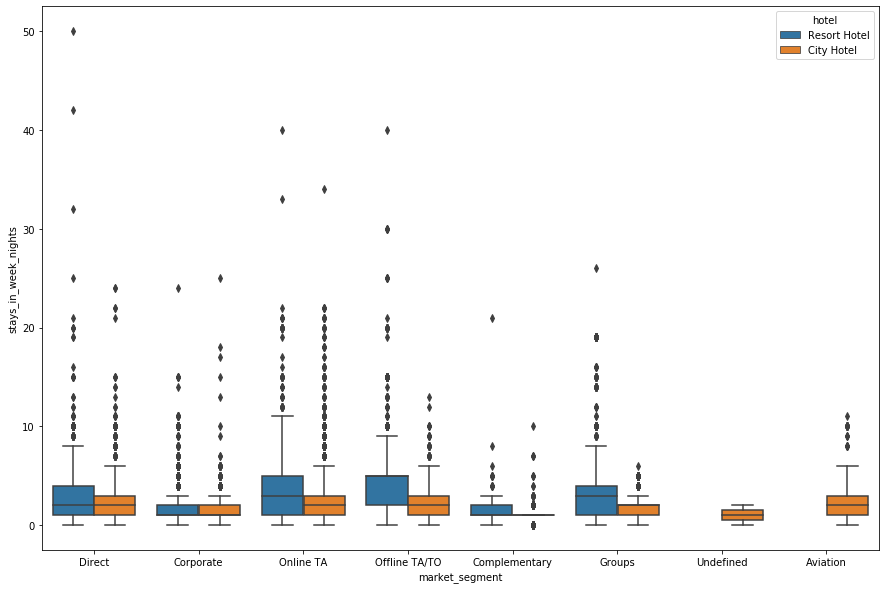

In [58]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'market_segment',y = 'stays_in_week_nights',data= New_Hotel,hue = 'hotel' )

##### Conclusion-->>
It can be seen that most of the groups are normal distributed, some of them have high skewness. Looking at the distribution, most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12-13 days
It is obvious that when people go to resort hotels, they prefer to stay more.

## 5.Analysing Preference of Guests, what they basically Prefer?

In [60]:
New_Hotel['meal'].value_counts() # types os meal basically guest prefered mostly people take BB breakfast 

BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

In [62]:
New_Hotel['meal'].value_counts().index

Index(['BB', 'HB', 'SC', 'Undefined', 'FB'], dtype='object')

In [64]:
px.pie(New_Hotel,names = New_Hotel['meal'].value_counts().index,values = New_Hotel['meal'].value_counts(),hole=0.5,
      title = "Meal Prefered by Guest in hotels")

#####  Conclusion-->>
Below the donut pie graph shows the meal categories. There is a big difference in the Bed&Breakfast category and the others. Almost 80% of bookings reserved for Bed&Breakfast.

##  6.Simplify your analysis on the basis of differen types of hotels & meals

In [68]:
New_Hotel.groupby(['hotel','meal']).agg({"meal":"count"}).unstack()

meal                                  
meal               BB     FB      HB       SC Undefined
hotel                                                  
City Hotel    62233.0   44.0  6412.0  10474.0       NaN
Resort Hotel  30003.0  754.0  8046.0     75.0    1169.0

 ### [A].Analyse Special Request done by Cuustomers

In [69]:
New_Hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

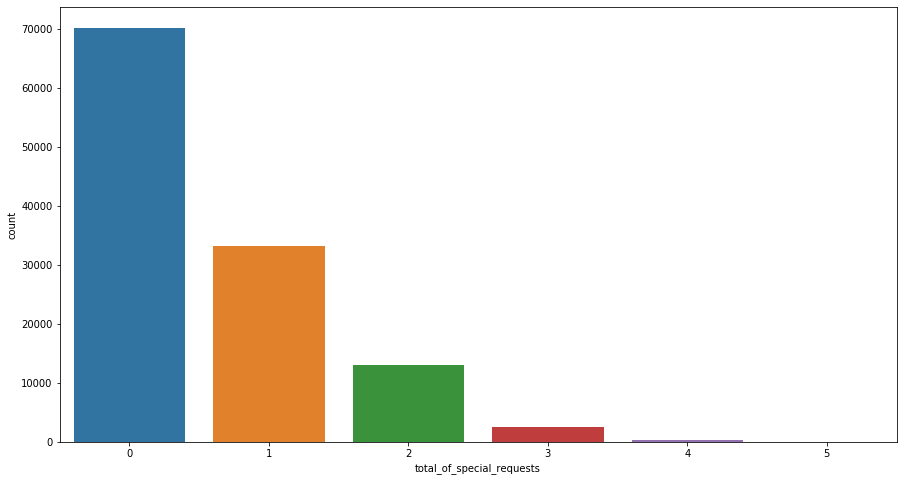

In [73]:
plt.figure(figsize=(15,8))
sns.countplot(x= 'total_of_special_requests',data= New_Hotel)

##### Conclusion-->>
Around 55% of bookings do not have any special requests

### [B].Analyse Special Request done by Cuustomers according to hotel type

In [74]:
New_Hotel.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [76]:
pivot = New_Hotel.groupby(['total_of_special_requests','is_canceled']).agg({'total_of_special_requests':'count'})

In [84]:
Pivot = pivot.rename({'total_of_special_requests':'Count'}).unstack()
Pivot

total_of_special_requests       
is_canceled                                       0      1
total_of_special_requests                                 
0                                             36667  33534
1                                             25867   7316
2                                             10086   2866
3                                              2049    445
4                                               304     36
5                                                38      2

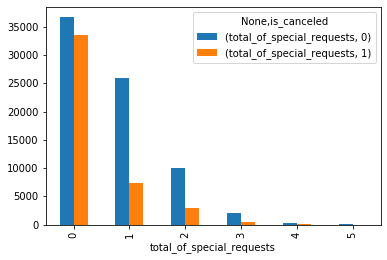

In [87]:
Pivot.plot(kind = 'bar')

##### Conclusion-->>
This graph is about the relationship between special requests and cancellation booking status. Nearly half bookings without any special requests have been cancelled and another half of them have not been canceled.

In [90]:
New_Hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## 7.Which are the most busy month or in which months Guests are high?

In [89]:
New_Hotel.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [94]:
Rush_Resort = Resort_Hotel['arrival_date_month'].value_counts().reset_index()
Rush_Resort

index  arrival_date_month
0      August                3257
1        July                3137
2     October                2575
3       March                2571
4       April                2550
5         May                2535
6    February                2308
7   September                2102
8        June                2037
9    December                2014
10   November                1975
11    January                1866

In [95]:
Rush_City = City_Hotel['arrival_date_month'].value_counts().reset_index()
Rush_City

index  arrival_date_month
0      August                5367
1        July                4770
2         May                4568
3        June                4358
4     October                4326
5   September                4283
6       March                4049
7       April                4010
8    February                3051
9    November                2676
10   December                2377
11    January                2249

In [99]:
stay = Rush_Resort.merge(Rush_City,on='index')
stay

index  arrival_date_month_x  arrival_date_month_y
0      August                  3257                  5367
1        July                  3137                  4770
2     October                  2575                  4326
3       March                  2571                  4049
4       April                  2550                  4010
5         May                  2535                  4568
6    February                  2308                  3051
7   September                  2102                  4283
8        June                  2037                  4358
9    December                  2014                  2377
10   November                  1975                  2676
11    January                  1866                  2249

In [100]:
stay.columns = ['month','total Resort hotel People','total City hotel people']

In [101]:
stay

month  total Resort hotel People  total City hotel people
0      August                       3257                     5367
1        July                       3137                     4770
2     October                       2575                     4326
3       March                       2571                     4049
4       April                       2550                     4010
5         May                       2535                     4568
6    February                       2308                     3051
7   September                       2102                     4283
8        June                       2037                     4358
9    December                       2014                     2377
10   November                       1975                     2676
11    January                       1866                     2249

In [102]:
New_stay = sd.Sort_Dataframeby_Month(stay,'month')

In [103]:
New_stay

month  total Resort hotel People  total City hotel people
0     January                       1866                     2249
1    February                       2308                     3051
2       March                       2571                     4049
3       April                       2550                     4010
4         May                       2535                     4568
5        June                       2037                     4358
6        July                       3137                     4770
7      August                       3257                     5367
8   September                       2102                     4283
9     October                       2575                     4326
10   November                       1975                     2676
11   December                       2014                     2377

In [105]:
px.line(New_stay,x='month',y=['total Resort hotel People','total City hotel people'])

##### Conclusion
 The City hotel has more guests during spring and autumn, when the prices are also highest.
In July and August there are less visitors, although prices are lower.

Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
Both hotels have the fewest guests during the winter.

## 8.How long do people stay at the hotels?

In [106]:
New_Hotel.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [107]:
filter = New_Hotel['is_canceled']==0
clean_data = New_Hotel[filter]

In [108]:
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [109]:
clean_data['total nights'] = clean_data['stays_in_weekend_nights'] + clean_data['stays_in_week_nights']

C:\Users\RAJAT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  company  \
0                        0                     0       2  ...    NaN      NaN   
1                        0                     0       2  ...    NaN      NaN   
2                        0                     1       1  ...    NaN      NaN   
3                        0                     1       1  ...  304.0      NaN   
4                        0                     2       2  ...  240.0      NaN   

  days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                    0     Transient   0.0                           0   
1                    0     Transient   0.0                           0   
2                    0     Transient  75.0                           0   
3                    0     Transient  75.0                           0   
4                    0     Transient  98.0                           0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0           Check-Out                 7/1/2015   
1                          0           Check-Out                 7/1/2015   
2                          0           Check-Out                 7/2/2015   
3                          0           Check-Out                 7/2/2015   
4                          1           Check-Out                 7/3/2015   

  total nights  
0            0  
1            0  
2            1  
3            1  
4            2  

[5 rows x 33 columns]

In [114]:
stay = clean_data.groupby(['total nights','hotel']).agg('count').reset_index()
stay = stay.iloc[:,0:3]

In [115]:
stay.head()

total nights         hotel  is_canceled
0             0    City Hotel          251
1             0  Resort Hotel          371
2             1    City Hotel         9155
3             1  Resort Hotel         6579
4             2    City Hotel        10983

In [121]:
stay = stay.rename(columns={'is_canceled':'count'})
stay.head()

total nights         hotel  count
0             0    City Hotel    251
1             0  Resort Hotel    371
2             1    City Hotel   9155
3             1  Resort Hotel   6579
4             2    City Hotel  10983

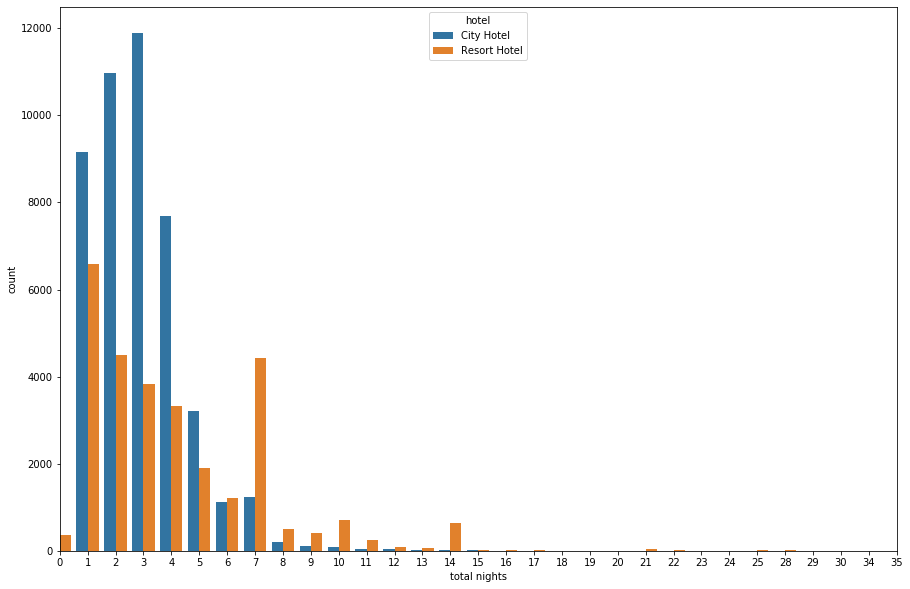

In [125]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'total nights', y = 'count', hue = 'hotel',data = stay)
plt.xlim(0,30)
plt.show()

##### Conclusion -->> 
###### 1.Most of the guest are stay in city hotel for 3 days
###### 2.Most of the guest are stay in resort hotel for 1 day only

## 9.Bookings by market segment

In [127]:
clean_data['market_segment'].value_counts()

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

In [130]:
px.pie(clean_data,names = clean_data['market_segment'].value_counts().index,
      values = clean_data['market_segment'].value_counts(),title = "Booking By Market Segment")

##### Conclusion -->>
###### so approx 50% people are book hotel by online TA market segment 
###### that mean guest are self book hotel with there mobile etc..

## 10.price per night (ADR) and person based on booking and room

In [132]:
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  company  \
0                        0                     0       2  ...    NaN      NaN   
1                        0                     0       2  ...    NaN      NaN   
2                        0                     1       1  ...    NaN      NaN   
3                        0                     1       1  ...  304.0      NaN   
4                        0                     2       2  ...  240.0      NaN   

  days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                    0     Transient   0.0                           0   
1                    0     Transient   0.0                           0   
2                    0     Transient  75.0                           0   
3                    0     Transient  75.0                           0   
4                    0     Transient  98.0                           0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0           Check-Out                 7/1/2015   
1                          0           Check-Out                 7/1/2015   
2                          0           Check-Out                 7/2/2015   
3                          0           Check-Out                 7/2/2015   
4                          1           Check-Out                 7/3/2015   

  total nights  
0            0  
1            0  
2            1  
3            1  
4            2  

[5 rows x 33 columns]

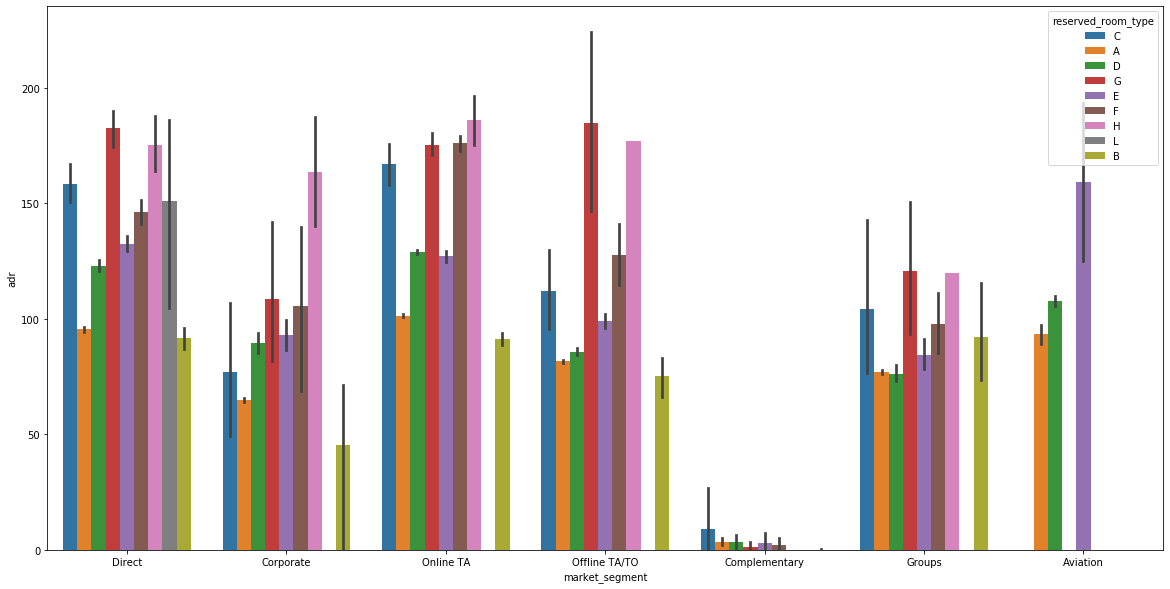

In [138]:
plt.figure(figsize=(20,10))
sns.barplot(x="market_segment",y="adr",hue ='reserved_room_type',data = clean_data )

##### conclusion -->>
###### when guest are book online room type H room is most book and price per night approx is 180 adr
###### when guest are book direct room type G room is most book and price per night approx is 180 adr


## 11.How many bookings were cancelled?

In [143]:
Cansal = New_Hotel[New_Hotel['is_canceled'] == 1]

In [144]:
Cansal.head()

hotel  is_canceled  lead_time  arrival_date_year  \
8   Resort Hotel            1         85               2015   
9   Resort Hotel            1         75               2015   
10  Resort Hotel            1         23               2015   
27  Resort Hotel            1         60               2015   
32  Resort Hotel            1         96               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
27               July                        27                          1   
32               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
8                         0                     3       2  ...    No Deposit   
9                         0                     3       2  ...    No Deposit   
10                        0                     4       2  ...    No Deposit   
27                        2                     5       2  ...    No Deposit   
32                        2                     8       2  ...    No Deposit   

    agent company days_in_waiting_list customer_type    adr  \
8   240.0     NaN                    0     Transient   82.0   
9    15.0     NaN                    0     Transient  105.5   
10  240.0     NaN                    0     Transient  123.0   
27  240.0     NaN                    0     Transient  107.0   
32    NaN     NaN                    0     Transient  108.3   

    required_car_parking_spaces  total_of_special_requests  \
8                             0                          1   
9                             0                          0   
10                            0                          0   
27                            0                          2   
32                            0                          2   

    reservation_status reservation_status_date  
8             Canceled                5/6/2015  
9             Canceled               4/22/2015  
10            Canceled               6/23/2015  
27            Canceled               5/11/2015  
32            Canceled               5/29/2015  

[5 rows x 32 columns]

In [147]:
RH_Cansal=Cansal[Cansal['hotel']=='Resort Hotel']['is_canceled'].sum()
RH_Cansal

11120

In [149]:
CH_Cansal=Cansal[Cansal['hotel']=='City Hotel']['is_canceled'].sum()
CH_Cansal

33079

In [151]:
px.pie(Cansal,values = [RH_Cansal,CH_Cansal])

##### Conclusion 
######  approx 75% Booking are cansal of City Hotel 
######  only 25% Booking is cansal of Resort Hotel

## 12.Which month have the highest number of cancellations?

In [152]:
New_Hotel.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [153]:
Cansalation = New_Hotel[New_Hotel['is_canceled'] == 1]

In [155]:
Cansalation.head()

hotel  is_canceled  lead_time  arrival_date_year  \
8   Resort Hotel            1         85               2015   
9   Resort Hotel            1         75               2015   
10  Resort Hotel            1         23               2015   
27  Resort Hotel            1         60               2015   
32  Resort Hotel            1         96               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
27               July                        27                          1   
32               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
8                         0                     3       2  ...    No Deposit   
9                         0                     3       2  ...    No Deposit   
10                        0                     4       2  ...    No Deposit   
27                        2                     5       2  ...    No Deposit   
32                        2                     8       2  ...    No Deposit   

    agent company days_in_waiting_list customer_type    adr  \
8   240.0     NaN                    0     Transient   82.0   
9    15.0     NaN                    0     Transient  105.5   
10  240.0     NaN                    0     Transient  123.0   
27  240.0     NaN                    0     Transient  107.0   
32    NaN     NaN                    0     Transient  108.3   

    required_car_parking_spaces  total_of_special_requests  \
8                             0                          1   
9                             0                          0   
10                            0                          0   
27                            0                          2   
32                            0                          2   

    reservation_status reservation_status_date  
8             Canceled                5/6/2015  
9             Canceled               4/22/2015  
10            Canceled               6/23/2015  
27            Canceled               5/11/2015  
32            Canceled               5/29/2015  

[5 rows x 32 columns]

In [158]:
Cansalation['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [159]:
Cansal_Month = Cansalation.groupby(['hotel','arrival_date_month']).agg('count').reset_index()

In [161]:
Cansal_Month = Cansal_Month.iloc[:,0:3]

In [164]:
Cansal_Month = Cansal_Month.rename(columns={'arrival_date_month': 'Month','is_canceled':"count"})

In [165]:
Cansal_Month

hotel      Month  count
0     City Hotel      April   3459
1     City Hotel     August   3600
2     City Hotel   December   1737
3     City Hotel   February   1899
4     City Hotel    January   1481
5     City Hotel       July   3301
6     City Hotel       June   3527
7     City Hotel      March   2385
8     City Hotel        May   3653
9     City Hotel   November   1660
10    City Hotel    October   3268
11    City Hotel  September   3109
12  Resort Hotel      April   1059
13  Resort Hotel     August   1637
14  Resort Hotel   December    631
15  Resort Hotel   February    794
16  Resort Hotel    January    325
17  Resort Hotel       July   1436
18  Resort Hotel       June   1007
19  Resort Hotel      March    763
20  Resort Hotel        May   1024
21  Resort Hotel   November    460
22  Resort Hotel    October    978
23  Resort Hotel  September   1006

In [166]:
Final = sd.Sort_Dataframeby_Month(Cansal_Month,'Month')

In [167]:
Final

hotel      Month  count
0     City Hotel    January   1481
1   Resort Hotel    January    325
2     City Hotel   February   1899
3   Resort Hotel   February    794
4     City Hotel      March   2385
5   Resort Hotel      March    763
6     City Hotel      April   3459
7   Resort Hotel      April   1059
8     City Hotel        May   3653
9   Resort Hotel        May   1024
10    City Hotel       June   3527
11  Resort Hotel       June   1007
12    City Hotel       July   3301
13  Resort Hotel       July   1436
14    City Hotel     August   3600
15  Resort Hotel     August   1637
16    City Hotel  September   3109
17  Resort Hotel  September   1006
18    City Hotel    October   3268
19  Resort Hotel    October    978
20    City Hotel   November   1660
21  Resort Hotel   November    460
22    City Hotel   December   1737
23  Resort Hotel   December    631

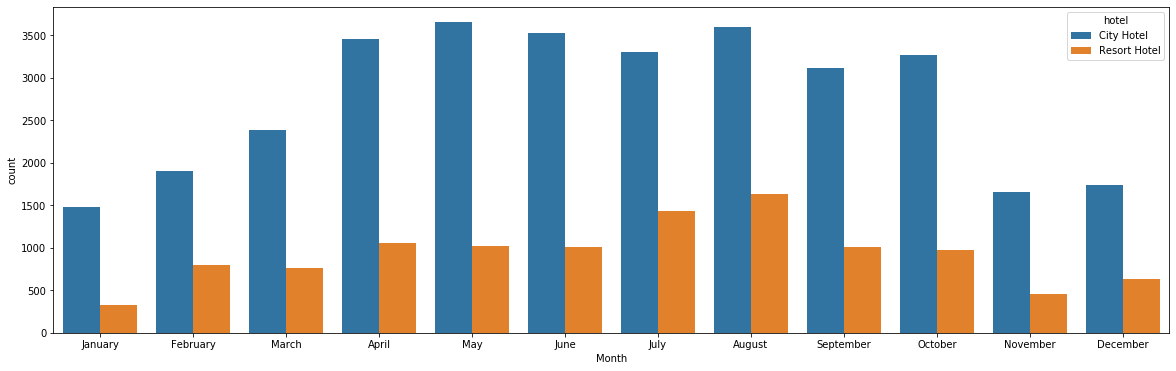

In [169]:
plt.figure(figsize=(20,6))
sns.barplot(x='Month',y='count',hue='hotel',data=Final)

##### conclusion
###### For the City hotel the relative number of cancelations is around 40 % throughout the year.
###### For the Resort hotel it is highest in the summer and lowest during the winter.

### This is all about the Hotel Booking Data Analysis in this project we do importing data,Preprocessing, Data Cleaning and Data Visualization and also find very helpfull insides from the Row data

# By Rajat Kumar Pancholi